In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#setup
import os, sys
current_path = os.path.abspath('')
parent_path = os.path.dirname(current_path)
source_path = f'{parent_path}\\src'
if not source_path in sys.path: sys.path.append(source_path)

#customs
# from data_model import *
# from data_helper import *
from config import *
setup()

Config finished!


In [3]:
in_names = ['X_train', 'X_val', 'y_train', 'y_val']
X_train, X_val, y_train, y_val = [pd.read_csv(f'./data/{name}.csv', index_col = 'Date', parse_dates=True) for name in in_names]

for df in X_train, X_val, y_train, y_val:
    print(df.shape, df.columns)

(1719, 16) Index(['LeagueDay', 'day_of_week', 'month', 'y_lag_1', 'y_lag_2', 'y_lag_3',
       'y_lag_4', 'rolling_mean', 'rolling_min', 'rolling_max',
       'general_rolling_mean', 'general_rolling_min', 'general_rolling_max',
       'expanding_mean', 'expanding_max', 'expanding_min'],
      dtype='object')
(88, 16) Index(['LeagueDay', 'day_of_week', 'month', 'y_lag_1', 'y_lag_2', 'y_lag_3',
       'y_lag_4', 'rolling_mean', 'rolling_min', 'rolling_max',
       'general_rolling_mean', 'general_rolling_min', 'general_rolling_max',
       'expanding_mean', 'expanding_max', 'expanding_min'],
      dtype='object')
(1719, 5) Index(['y_step_1', 'y_step_2', 'y_step_3', 'y_step_4', 'y_step_5'], dtype='object')
(88, 5) Index(['y_step_1', 'y_step_2', 'y_step_3', 'y_step_4', 'y_step_5'], dtype='object')


In [10]:
class PersistenceModel:
    '''
    This baseline model just gets the last y that's closest to the horizon
    To make prediction
    Meaning if we have y_lag_1, 2 ,3 
    and try to predict y_step_1, 2, 3
    The prediction is all y_step_1 (most recent)
    '''
    def __init__(self, last_observation_col = 'y_lag_1', out_step_cols = ['y_step_1', 'y_step_2', 'y_step_3', 'y_step_4', 'y_step_5']):
        self.out_step_cols = out_step_cols
        self.last_observation_col = last_observation_col
    def fit(self, X,y):
        pass
    def predict(self, X):
        df_return = pd.DataFrame()
        for y_out_col in self.out_step_cols:
            df_return[y_out_col] = X[self.last_observation_col]
        
        df_return.index = X.index
        return df_return


In [11]:
model = PersistenceModel(
    last_observation_col = 'y_lag_1',
    out_step_cols= y_train.columns
)

model.fit(X_train, y_train) # this actually does nothing

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
def evaluate(model, X_val, y_val):
    pred = model.predict(X_val)
    mse = mean_squared_error(pred, y_val)
    mape = mean_absolute_percentage_error(pred, y_val)
    print('Result - MSE: ', mse, ' - MAPE: ', mape)

In [13]:
evaluate(model, X_train, y_train)
evaluate(model, X_val, y_val)

Result - MSE:  378.85691338804025  - MAPE:  171121223663356.1
Result - MSE:  689.6415872684256  - MAPE:  3710295056608810.5


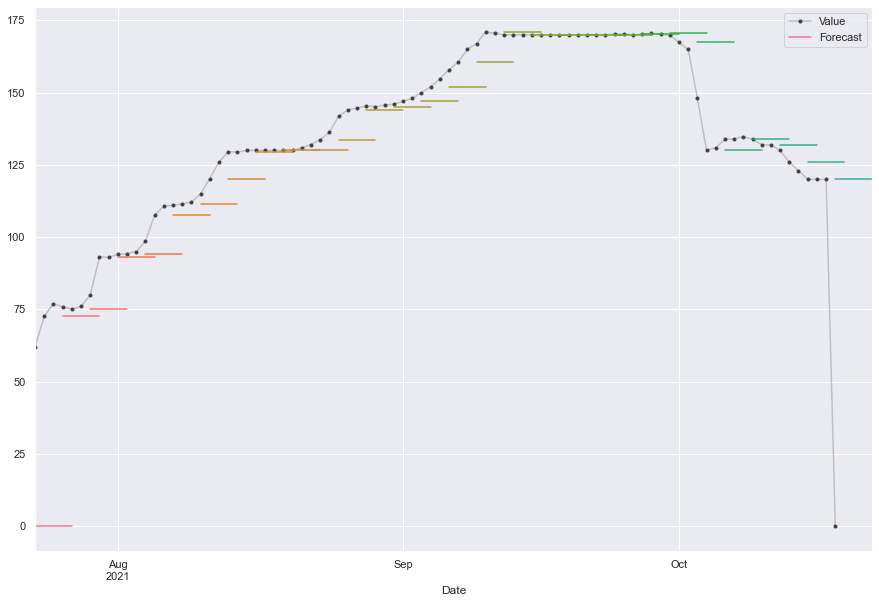

In [17]:
def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

def plot_stepped_predictions(model, X_val, y_val, prediction_step = 3):
    pred = pd.DataFrame(
        model.predict(X_val),
        index = y_val.index, columns = y_val.columns
    )
    palette = dict(palette='husl', n_colors=64)
    ax2 = y_val['y_step_1'].plot(**plot_params)
    ax2 = plot_multistep(pred, ax=ax2, palette_kwargs=palette, every=prediction_step)
    _ = ax2.legend(['Value', 'Forecast'])

    plt.show()

plot_stepped_predictions(model, X_val, y_val)

# Conclusion:
Super bad 

https://stats.stackexchange.com/questions/341605/mape-value-more-than-100

https://stats.stackexchange.com/questions/463554/how-do-i-interpret-mean-absolute-error-mae-or-mean-absolute-percentage-error

Result - MSE:  378.85691338804025  - MAPE:  171121223663356.1

Result - MSE:  689.6415872684256  - MAPE:  3710295056608810.5